In [17]:
import pandas as pd
import matplotlib as mpl    


In [18]:
df = pd.read_csv('data/bse_data.csv')
df.head()

,number_siblings,name,gender,age,living_allowance,have_bf_gf,profession,daily_meals
0,1,Nakasujja Gertrude,female,33,NaN,1,Data Scientist,2
1,3,Arinda Asiimwe Atweta,female,23,"50,000",1,Machine Learning Enginer,1
2,4,Ndjekornom Victoire,male,23,"25,000",0,Data Scientist,1
3,0,KATURAMU EDGAR,male,27,"500,000",0,Machine Learning Enginer,2
4,4,Abinsinguza Lasse,male,24,"100,000",1,Data Scientist,2


In [24]:
""" 
Data Cleaning/ Preprocessing
 1. Empty Cells
 2. Duplicates
 3. Wrong format
 4. Missing Values
"""
#Check for null
print(df.isnull().sum())


number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [20]:
# Check for duplicates
print(df.duplicated().sum())

0


In [31]:
#check for data type
print(df.dtypes)

number_siblings      int64
name                object
gender              object
age                  int64
living_allowance    object
have_bf_gf           int64
profession          object
daily_meals          int64
dtype: object


In [21]:
#Chech for wrong data
print(df['have_bf_gf'].unique())

[1 0]


In [30]:
# check and correct missing values
mean_living_allowance = df['living_allowance'].mode()

df['living_allowance'] = df['living_allowance'].fillna(mean_living_allowance)

df.head(3)


,number_siblings,name,gender,age,living_allowance,have_bf_gf,profession,daily_meals
0,1,Nakasujja Gertrude,female,33,"200,000",1,Data Scientist,2
1,3,Arinda Asiimwe Atweta,female,23,"50,000",1,Machine Learning Enginer,1
2,4,Ndjekornom Victoire,male,23,"25,000",0,Data Scientist,1


In [44]:
# Exploratory Data Analysis (EDA)
print(df['have_bf_gf'].value_counts())


have_bf_gf_dist = df.loc[df['have_bf_gf']==1]['gender'].value_counts()
print(have_bf_gf_dist)

have_no_bf_gf_dist = df.loc[df['have_bf_gf']!=1]['gender'].value_counts()
print(have_no_bf_gf_dist)


have_bf_gf
0    24
1    12
Name: count, dtype: int64
gender
male      7
female    5
Name: count, dtype: int64
gender
male      17
female     7
Name: count, dtype: int64


In [ ]:
#V

Text(0.5, 1.0, 'Gender Dist Bar chart for gender with bf and gf')

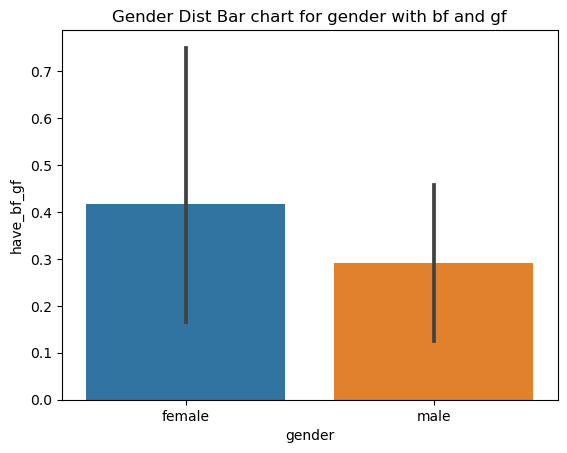

In [62]:
# Visualization
import seaborn as sn
import matplotlib.pyplot as plt

sn.barplot(x='gender', y='have_bf_gf', data=df)
plt.title('Gender Dist Bar chart for gender with bf and gf')



Using plot


Text(0.5, 0, 'Gender')

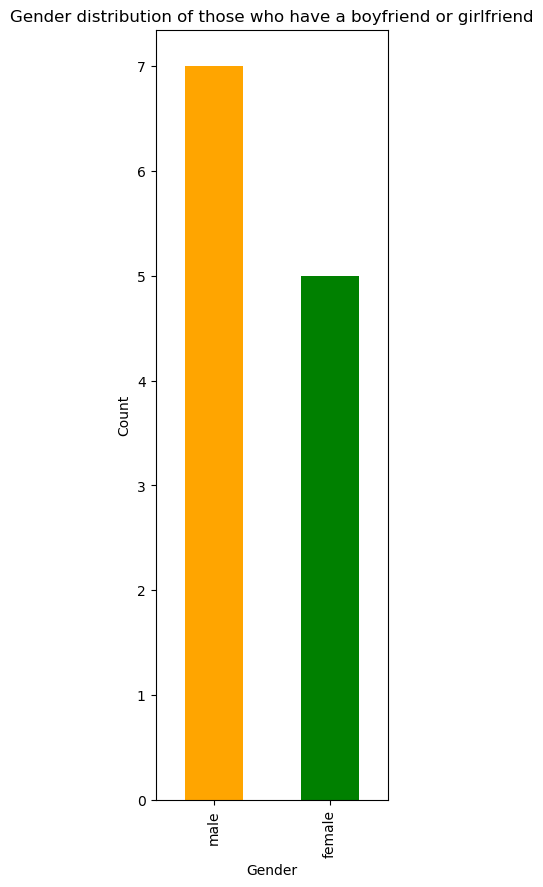

In [63]:
print("Using plot")
gender_has_bf_gf = df.loc[(df['gender'].isin(['male', 'female'])) & (df['have_bf_gf'] == 1)]['gender'].value_counts()

ax = gender_has_bf_gf.plot(kind="bar", color=['orange','green'], figsize=(3,10))
plt.title("Gender distribution of those who have a boyfriend or girlfriend")
plt.ylabel("Count")
plt.xlabel("Gender")

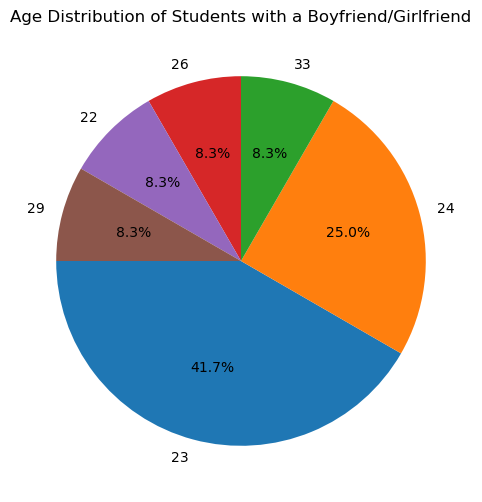

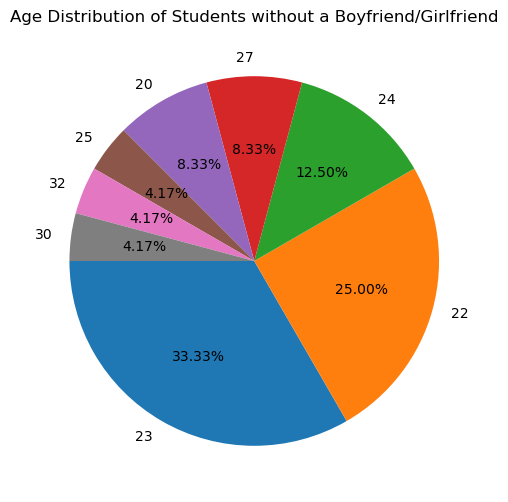

In [72]:
# a) Pie Chart
filtered_data_with_bg_gf = df.loc[df['have_bf_gf'] == 1, 'age']
ax = filtered_data_with_bg_gf.value_counts().plot(kind="pie", figsize=(10, 6), autopct='%1.1f%%', startangle=180)
plt.title('Age Distribution of Students with a Boyfriend/Girlfriend')
plt.ylabel('') 
plt.show()

filtered_data_without_bg_gf = df.loc[df['have_bf_gf'] == 0, 'age']
ay = filtered_data_without_bg_gf.value_counts().plot(kind="pie", figsize=(10,6), autopct='%1.2f%%', startangle=180)
plt.title('Age Distribution of Students without a Boyfriend/Girlfriend')
plt.ylabel('') 
plt.show()

In [74]:
crop_df = pd.read_csv('data/crop.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [76]:
#Data Cleaning
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [78]:
# check for duplicates
crop_df.duplicated().sum()

0

In [81]:
# Check for repeated values
crop_df['N'].unique().sum()

9343

In [82]:
#Expleratory
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

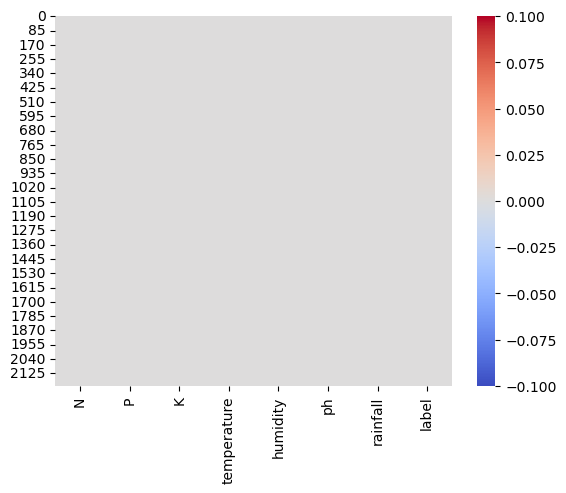

In [86]:
#Check for null values using heatmap
import seaborn as sn
sn.heatmap(crop_df.isnull(), cmap="coolwarm")

/home/derrick-legacy256/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/derrick-legacy256/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/derrick-legacy256/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/derrick-legacy256/anaconda3/lib/python3.11

<Axes: ylabel='Count'>

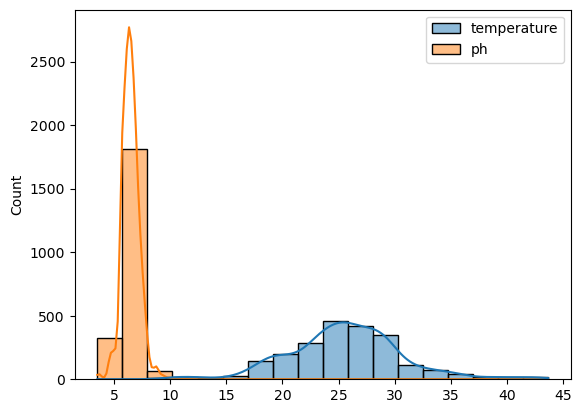

In [94]:
#distribution for temp and ph
temp_ph_dist = crop_df[['temperature','ph']]

sn.histplot(temp_ph_dist, kde=True)

<Axes: xlabel='count', ylabel='label'>

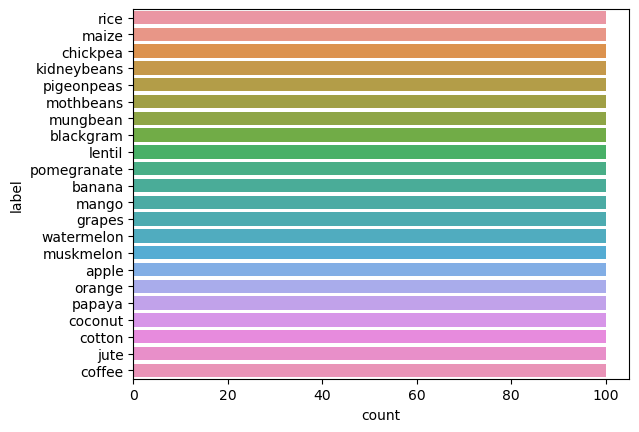

In [126]:

sn.countplot(data=crop_df, y='label')
# sn.countplot(data=cr                                                                                                                      op_df, x='label')

<Axes: ylabel='Frequency'>

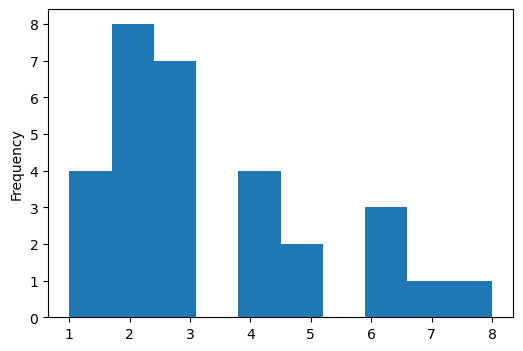

In [133]:
# new_data = crop_df[crop_df['ph'].round(2)]
rice_ph = crop_df.loc[crop_df['label']=="rice",['ph','label']].round(1).value_counts()

rice_ph.plot(kind='hist', figsize=(6,4))

# sn.barplot(data=rice_ph[], )